<a href="https://colab.research.google.com/github/Nhutsang/Baocaogiuaky/blob/main/Trainface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from numpy import asarray,save
from sklearn.model_selection import train_test_split
from time import time
from keras.utils import load_img, img_to_array
from keras.utils  import to_categorical
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy

In [3]:
folder = '/content/drive/MyDrive/TrainAI/Trainning/'

In [14]:
img_size = 100;
photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('sang'):
    output = 1.0
  if file.startswith('minh'):
    output = 2.0
  if file.startswith('Phuc'):
    output = 3.0
  if file.startswith('Hoang'):
    output = 4.0
  if file.startswith('duynhat'):
    output = 5.0
  if file.startswith('Loc'):
    output = 6.0
  
  photo = load_img(folder + file, target_size = (img_size,img_size))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = np.array(labels)
print(photos.shape, labels.shape)
# save('/content/drive/MyDrive/anh/hoa/hoa_photos.npy',photos)
# save('/content/drive/MyDrive/anh/hoa/hoa_labels.npy',labels)

(100, 100, 100, 3) (100,)


In [15]:
photos = photos.astype('float32')/255.0
print(photos.shape)
     

(100, 100, 100, 3)


In [16]:
(trainX, testX, trainY, testY) = train_test_split(photos, labels, test_size=0.20, stratify=labels, random_state=10)
(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.25, random_state=10)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)

(60, 100, 100, 3)
(60,)
(20, 100, 100, 3)
(20,)
(20, 100, 100, 3)
(20,)


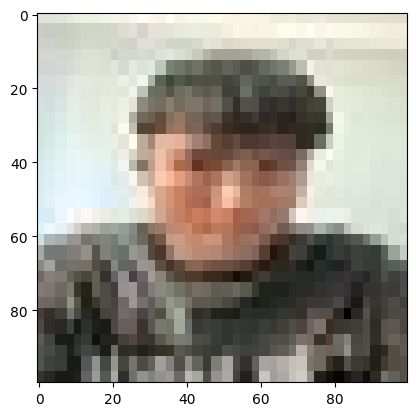

Hinh này là:  6.0


In [17]:
image_test= 50
hinh = trainX[image_test]
plt.imshow(hinh) 
plt.show()  
print('Hinh này là: ', trainY[image_test])

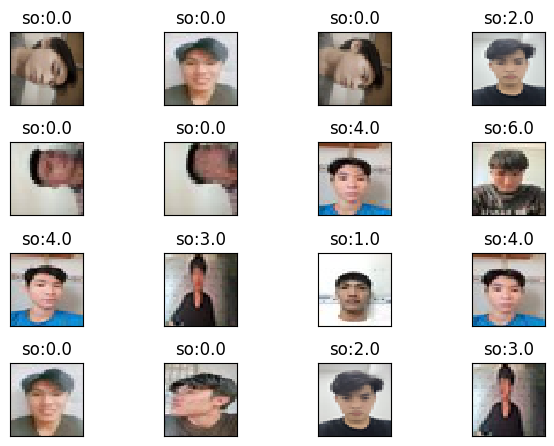

In [20]:
for i in range(16):  # 25 hình ảnh
  plt.subplot(4,4,i+1) # 5 cột , 5 hàng
  plt.tight_layout()
  plt.imshow(trainX[i], interpolation='none')
  plt.title('so:{}'.format(trainY[i]))
  plt.xticks([])
  plt.yticks([])

In [21]:
 #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
trainY = to_categorical (trainY)
testY=to_categorical(testY)
valY=to_categorical(valY)

print(trainY.shape)
print(testY.shape)
print(valY.shape)

(60, 7)
(20, 7)
(20, 7)


In [24]:
batch_size=32
epochs= 50
classes = 7

#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()

# 1 bộ VGG
model.add(Conv2D(32, kernel_size=(3,3), activation = 'linear', input_shape=(img_size,img_size,3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))


# Bộ 2 VGG
model.add(Conv2D(64,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))


# Bộ 3 VGG
model.add(Conv2D(128,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# Bộ 4 VGG
model.add(Conv2D(256,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(512, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))     

model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

In [25]:
start = time()
train = model.fit(trainX, trainY, batch_size,epochs=epochs,verbose = 1, validation_data=(valX, valY))
print(time()-start)
     

Epoch 1/30
2/2 [==============================] - 4s 1s/step - loss: 2.4609 - accuracy: 0.2667 - val_loss: 1.9419 - val_accuracy: 0.1500
Epoch 2/30
2/2 [==============================] - 2s 1s/step - loss: 1.9182 - accuracy: 0.2333 - val_loss: 1.9195 - val_accuracy: 0.1000
Epoch 3/30
2/2 [==============================] - 2s 1s/step - loss: 1.8075 - accuracy: 0.2833 - val_loss: 1.6725 - val_accuracy: 0.4000
Epoch 4/30
2/2 [==============================] - 2s 1s/step - loss: 1.6222 - accuracy: 0.4000 - val_loss: 1.7694 - val_accuracy: 0.5500
Epoch 5/30
2/2 [==============================] - 3s 2s/step - loss: 1.3975 - accuracy: 0.6667 - val_loss: 1.2821 - val_accuracy: 0.4000
Epoch 6/30
2/2 [==============================] - 3s 2s/step - loss: 0.9460 - accuracy: 0.5667 - val_loss: 0.8311 - val_accuracy: 0.9500
Epoch 7/30
2/2 [==============================] - 2s 1s/step - loss: 0.5312 - accuracy: 0.9167 - val_loss: 0.8745 - val_accuracy: 0.6500
Epoch 8/30
2/2 [=========================

In [ ]:
model.save('/content/drive/MyDrive/TrainAI/Test/')

Text(0.5, 0, 'Epoch')

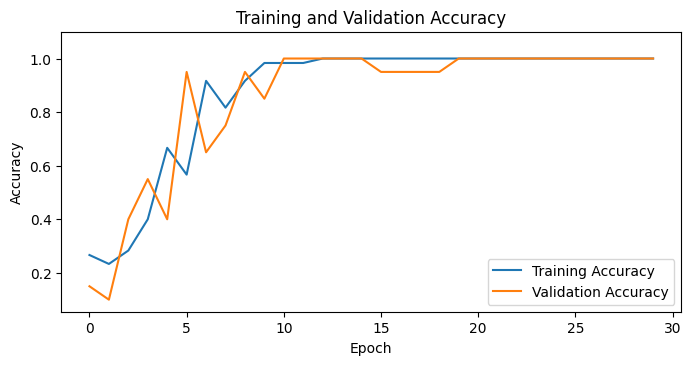

In [27]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
     

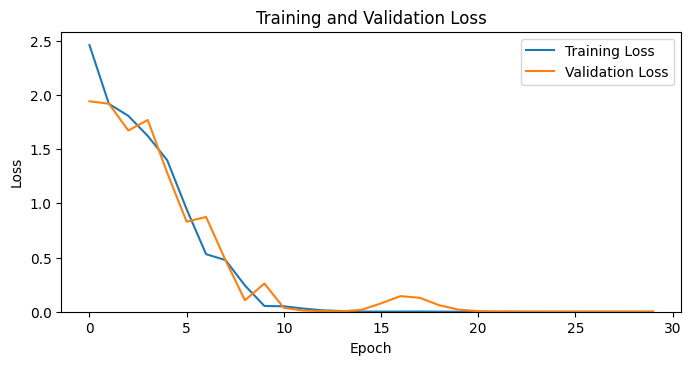

In [28]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']
loss=train.history['loss']
val_loss=train.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim(0)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()
     

1/1 [==============================] - 0s 36ms/step
Predicted:  sang


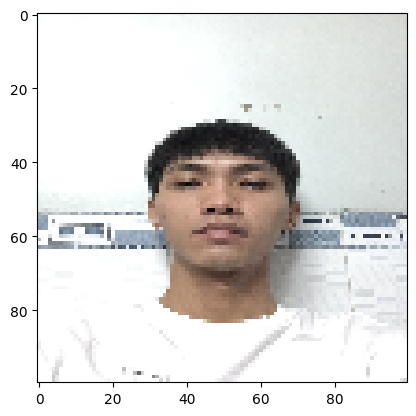

In [57]:
name= {1:'sang', 2:'minh',3:'Phuc',4:'Hoang',5:'duynhat',6:'Loc'}  
#test
filePath = '/content/drive/MyDrive/TrainAI/Check/sang.jpg'
testImage = load_img(filePath, target_size=(img_size,img_size))
arrayImage = img_to_array(testImage).reshape(1,img_size,img_size,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", name[pred])
plt.imshow(testImage)
    

In [58]:

# Tạo một mảng các chỉ số ngẫu nhiên
random_indices = np.random.choice(len(testX), size=20, replace=False)

# Lấy ra 30 mẫu ngẫu nhiên từ tập dữ liệu testX và testY
random_testX = testX[random_indices]
random_testY = testY[random_indices]

# Dùng mô hình để dự đoán nhãn của các mẫu trong tập dữ liệu ngẫu nhiên
results = model.predict(random_testX)
predicted_labels = np.argmax(results, axis=1)

from sklearn.metrics import accuracy_score
# tính độ chính xác 
accuracy = accuracy_score(np.argmax(random_testY, axis=1), predicted_labels)
print("Accuracy:", accuracy*100,"%")

1/1 [==============================] - 0s 362ms/step
Accuracy: 100.0 %
